In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [5]:
#Reading the Data
df=pd.read_csv('/content/Reviews.csv')

In [6]:
print(df.shape)

(179792, 10)


In [7]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [8]:
print(df.shape)

(179792, 10)


# **EDA**

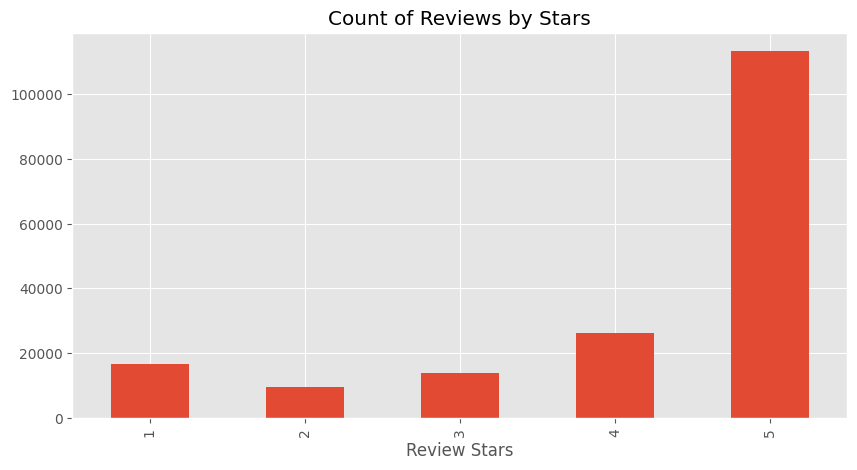

In [9]:
ax=df['Score'].value_counts().sort_index().plot(kind='bar',
                                             title='Count of Reviews by Stars',
                                             figsize=(10,5))
ax.set_xlabel('Review Stars')
plt.show()

# **NLTK**

In [10]:
example=df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [11]:
import nltk
try:
    nltk.data.find('tokenizers/punkt')
    print("NLTK 'punkt' resource is installed.")
except LookupError:
    print("NLTK 'punkt' resource is not installed.")

NLTK 'punkt' resource is not installed.


In [12]:
import nltk
nltk.download('punkt_tab')   # Download the required tokenizer data


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [13]:
import nltk
nltk.download('punkt_tab')   # Download the required tokenizer data


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [14]:
tokens=nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [15]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [16]:
tagged=nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [17]:
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')


[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [18]:
!pip install svgling


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 7.2 MB/s eta 0:00:00


In [19]:
entities=nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


# 1.VADER Sentiment Analysis

This uses a BagofWords Approach:
*   Stop Words are Removed
*   Each word is scored and combined to a total score

In [20]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [21]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia=SentimentIntensityAnalyzer()

In [22]:
sia.polarity_scores('I am so happy')

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [23]:
sia.polarity_scores('This is a fruit')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [24]:
sia.polarity_scores('you are Bad')

{'neg': 0.636, 'neu': 0.364, 'pos': 0.0, 'compound': -0.5423}

In [25]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [26]:
#Run the polarity score on the entire Dataset
res={}
for i,row in tqdm(df.iterrows(),total=len(df)):
  text=str(row['Text']) if not pd.isna(row['Text']) else '' # Convert to string and handle NaN
  myid=row['Id']
  res[myid]=sia.polarity_scores(text)

  0%|          | 0/179792 [00:00<?, ?it/s]

In [27]:
vaders=pd.DataFrame(res).T
vaders=vaders.reset_index().rename(columns={'index':'Id'})
vaders=vaders.merge(df,how='left')

In [28]:
vaders

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179787,179788,0.000,0.711,0.289,0.9491,B008GRONV6,A11HQTWY5BVJDT,Rachelle Turner,0,0,5,1333065600,Came the very next day!,Previously I had been buying lunch meat and wr...
179788,179789,0.019,0.916,0.064,0.7269,B008GRONV6,A3BO0JMCI43U88,Paula Gorton,0,0,5,1332633600,The dogs love these.,Our vet prescribed medication for one of our d...
179789,179790,0.000,0.956,0.044,0.3612,B008GRONV6,A2EWKDFIN9EDG4,lhzapf,0,0,5,1332115200,Thank goodness for this product!,I typically don't feed my dog anything that is...
179790,179791,0.000,1.000,0.000,0.0000,B008GRONV6,ANVDL62007QEP,Sacco,0,0,5,1331942400,Petsmart: $9.99,oh boy! I literally just got back from Pet Sm...


# **Poltting VADER Results**

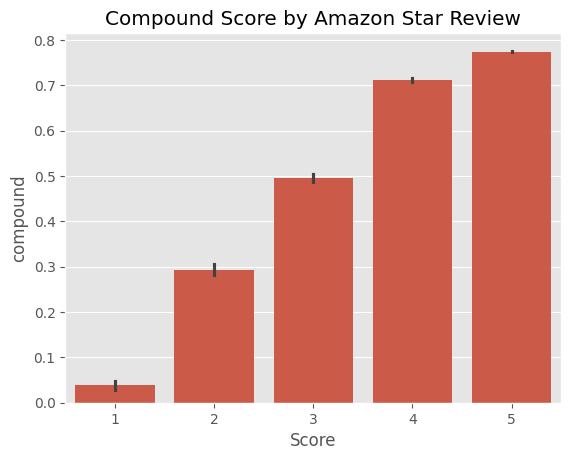

In [29]:

ax=sns.barplot(data=vaders,  x='Score',y='compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

Text(0.5, 1.0, 'Negative')

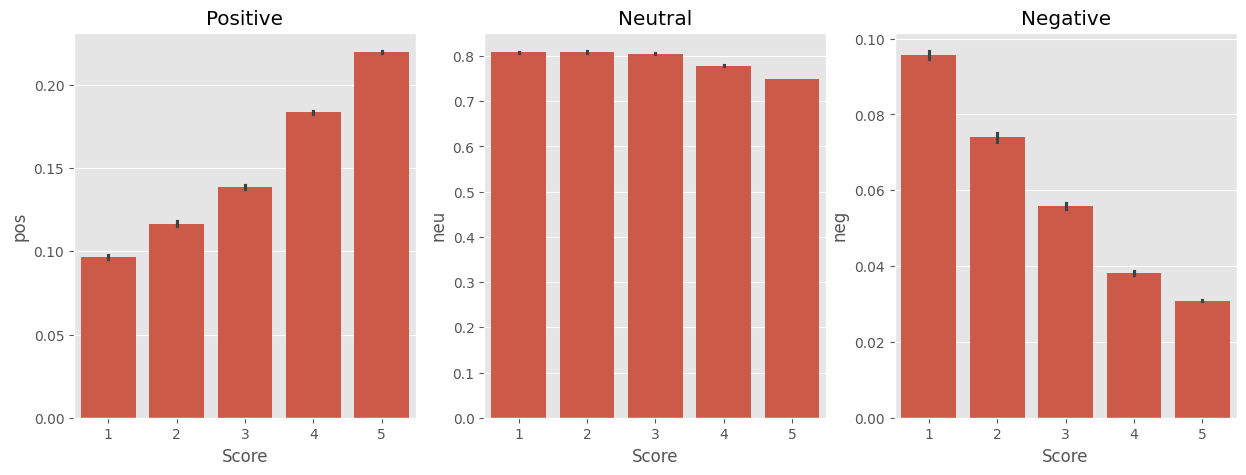

In [30]:
fig,axs=plt.subplots(1,3,figsize=(15,5))
sns.barplot(data=vaders,x='Score',y='pos',ax=axs[0])
sns.barplot(data=vaders,x='Score',y='neu',ax=axs[1])
sns.barplot(data=vaders,x='Score',y='neg',ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')

## Roberta Pretrained Model



1.   RoBERTa (Robustly Optimized BERT Pretraining Approach) is an improved version of BERT by Facebook AI.
2.  It’s trained on more data, for longer, and with larger batches, without the next sentence prediction task.
Commonly used for NLP tasks like sentiment analysis, text classification, and question answering.



In [31]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [32]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [34]:
#vader results on example
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [37]:
# Run for roberta model
encoded_text=tokenizer(example,return_tensors='pt')

In [41]:
output=model(**encoded_text)
scores=output[0][0].detach().numpy()
scores=softmax(scores)
scores_dict={
    'roberta_neg':scores[0],
    'roberta_neu':scores[1],
    'roberta_pos':scores[2]
}
print(scores_dict)

{'roberta_neg': np.float32(0.97635514), 'roberta_neu': np.float32(0.020687465), 'roberta_pos': np.float32(0.0029573692)}


In [51]:
def polarity_scores_roberta(texts):
  encoded_text=tokenizer(texts,return_tensors='pt', padding=True, truncation=True)
  output=model(**encoded_text)
  scores=output[0].detach().numpy()
  scores=softmax(scores, axis=1)
  results = []
  for score in scores:
      scores_dict={
        'roberta_neg':score[0],
        'roberta_neu':score[1],
        'roberta_pos':score[2]
      }
      results.append(scores_dict)
  return results

In [ ]:
#Run the polarity score on the entire Dataset
res={}
batch_size = 16 # You can adjust this based on your system's memory
for i in tqdm(range(0, len(df), batch_size)):
  batch_df = df.iloc[i:i+batch_size]
  batch_texts = batch_df['Text'].fillna('').astype(str).tolist()
  batch_ids = batch_df['Id'].tolist()

  try:
    # Get RoBERTa results for the batch
    roberta_results = polarity_scores_roberta(batch_texts)

    # Get VADER results and combine with RoBERTa results for each review in the batch
    for j, text in enumerate(batch_texts):
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {f'vader_{k}': v for k, v in vader_result.items()}
        # Combine Vader results with the corresponding Roberta result from the batch
        both = {**vader_result_rename, **roberta_results[j]}
        res[batch_ids[j]] = both

  except RuntimeError:
    print(f'Broke for batch starting at index {i}')

  0%|          | 0/11237 [00:00<?, ?it/s]

Broke for batch starting at index 80
Broke for batch starting at index 176
Broke for batch starting at index 528
Broke for batch starting at index 736
Broke for batch starting at index 848


In [ ]:
results_df=pd.DataFrame(res).T
results_df=results_df.reset_index().rename(columns={'index':'Id'})
results_df=results_df.merge(df,how='left')